# Import Library

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import cv2
import mediapipe as mp
print(os.listdir("frames - Copy"))


['A (1).png', 'A (10).png', 'A (100).png', 'A (101).png', 'A (102).png', 'A (103).png', 'A (104).png', 'A (105).png', 'A (106).png', 'A (107).png', 'A (108).png', 'A (109).png', 'A (11).png', 'A (110).png', 'A (111).png', 'A (112).png', 'A (113).png', 'A (114).png', 'A (115).png', 'A (116).png', 'A (117).png', 'A (118).png', 'A (119).png', 'A (12).png', 'A (120).png', 'A (121).png', 'A (122).png', 'A (123).png', 'A (124).png', 'A (125).png', 'A (126).png', 'A (127).png', 'A (128).png', 'A (129).png', 'A (13).png', 'A (130).png', 'A (131).png', 'A (132).png', 'A (133).png', 'A (134).png', 'A (135).png', 'A (136).png', 'A (137).png', 'A (138).png', 'A (139).png', 'A (14).png', 'A (140).png', 'A (141).png', 'A (142).png', 'A (143).png', 'A (144).png', 'A (145).png', 'A (146).png', 'A (147).png', 'A (148).png', 'A (149).png', 'A (15).png', 'A (150).png', 'A (151).png', 'A (152).png', 'A (153).png', 'A (154).png', 'A (155).png', 'A (156).png', 'A (157).png', 'A (158).png', 'A (159).png', '

# Define Constants

In [2]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [3]:

category_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13,'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23, 'Z': 24}

filenames = os.listdir("frames - Copy")
categories = []

for filename in filenames:
    category = filename.split(' ')[0]
    if category in category_mapping:
        categories.append(category_mapping[category])
   
print(categories)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [4]:
df.head(-1)

,filename,category
0,A (1).png,0
1,A (10).png,0
2,A (100).png,0
3,A (101).png,0
4,A (102).png,0
...,...,...
8697,Z (94).png,24
8698,Z (95).png,24
8699,Z (96).png,24
8700,Z (97).png,24


### See Total In count

<Axes: xlabel='category'>

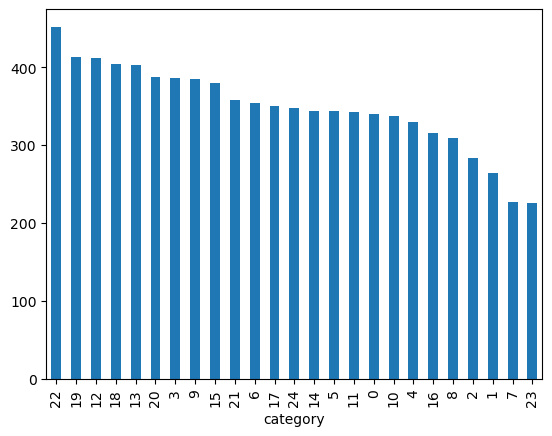

In [5]:
df['category'].value_counts().plot.bar()

In [9]:
df['category'].value_counts().sort_index()

category
0     340
1     265
2     284
3     386
4     330
5     344
6     355
7     227
8     310
9     385
10    338
11    343
12    412
13    403
14    344
15    380
16    316
17    350
18    405
19    414
20    388
21    358
22    452
23    226
24    348
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import RandomOverSampler

# Define the target number of samples per category
target_samples = 1000

# Calculate the number of additional samples needed per category
additional_samples = target_samples - df['category'].value_counts()

# Initialize a RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy={category: target_samples for category, count in additional_samples.items() if count > 0})

# Resample the entire dataset
X_resampled, y_resampled = oversampler.fit_resample(df.drop(columns=['category']), df['category'])

# Concatenate the resampled features and labels
dataframe = pd.concat([pd.DataFrame(X_resampled, columns=df.drop(columns=['category']).columns), pd.Series(y_resampled, name='category')], axis=1)

# Check the class distribution after resampling
print(dataframe['category'].value_counts().sort_index())


category
0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
13    1000
14    1000
15    1000
16    1000
17    1000
18    1000
19    1000
20    1000
21    1000
22    1000
23    1000
24    1000
Name: count, dtype: int64


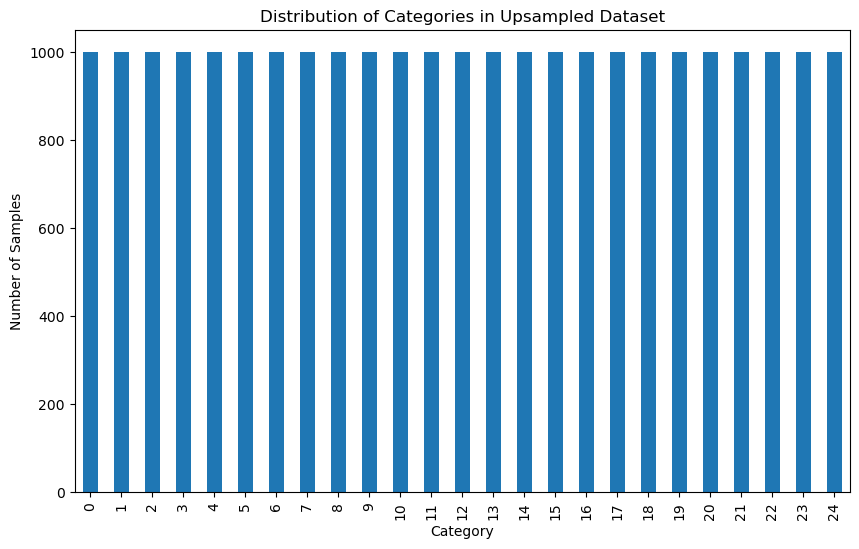

In [11]:
import matplotlib.pyplot as plt

# Plot the distribution of categories in the upsampled dataset
plt.figure(figsize=(10, 6))
dataframe['category'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Categories in Upsampled Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.show()

In [20]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [21]:
from keras.preprocessing.image import ImageDataGenerator

dataframe['category'] = dataframe['category'].astype(str)

# Define augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    rescale=1./255
)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=dataframe,
    directory='frames - Copy',
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=True
)

Found 25000 validated image filenames belonging to 25 classes.


In [22]:
validation_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validate_df, 
    directory="frames - copy/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 25 classes.


In [23]:
print(df['category'].dtype)

int64


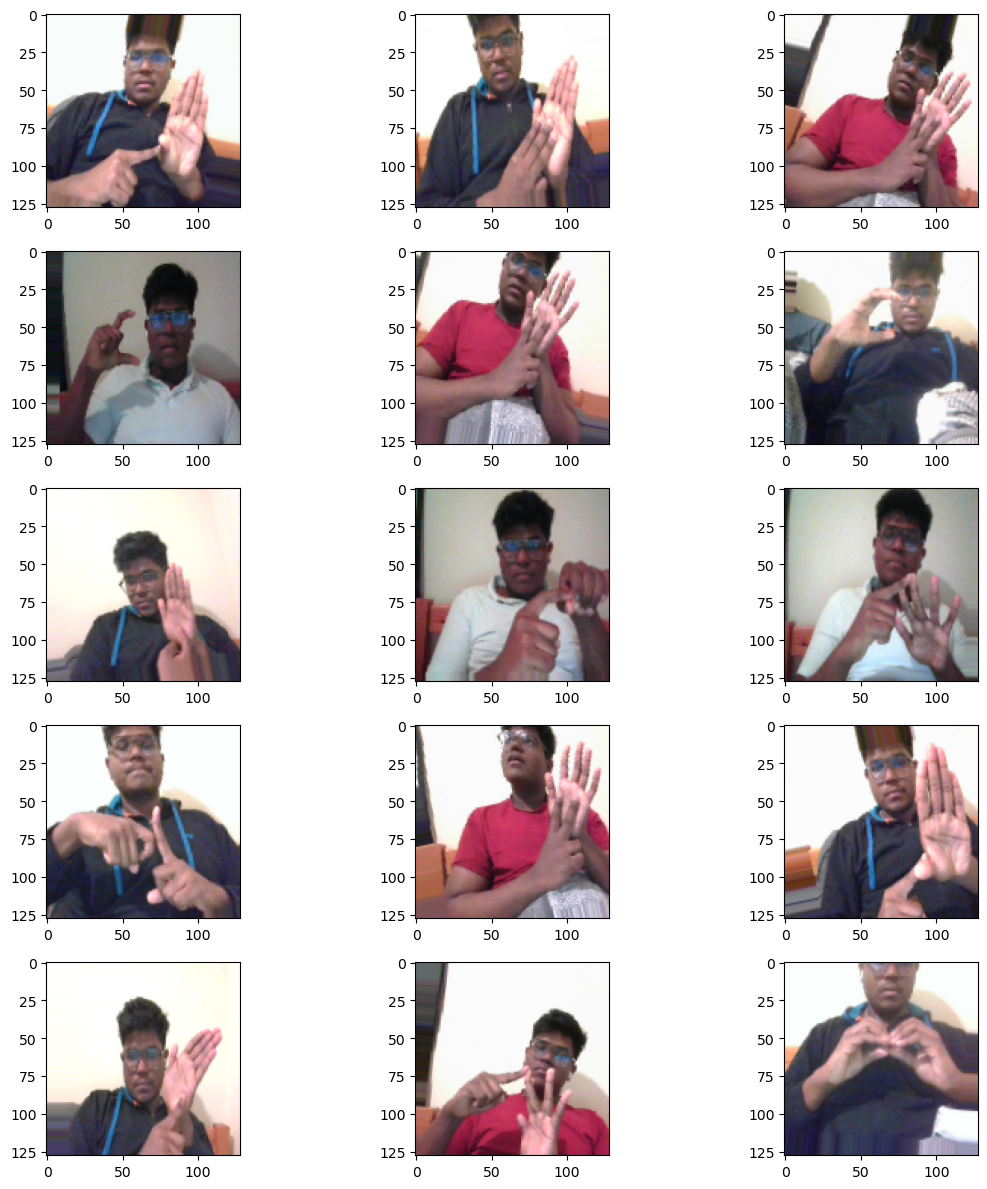

In [24]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    # Generate a batch of data
    X_batch, y_batch = next(train_generator)
    # Plot the first image from the batch
    image = X_batch[0]
    plt.imshow(image)
plt.tight_layout()
plt.show()

# Sample image

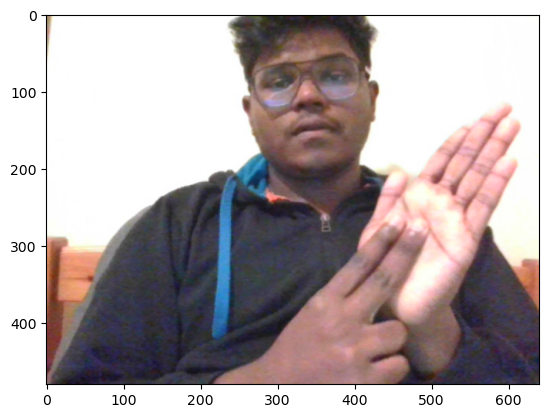

In [13]:
sample = random.choice(filenames)
image = load_img("frames - Copy/"+sample)
plt.imshow(image)

# CNN VGG16 Model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.applications import VGG16

# Loading VGG16 model without the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))

# Freezing the convolutional base
for layer in vgg_base.layers:
    layer.trainable = False

#model
model = Sequential()

#VGG16 convolutional base
model.add(vgg_base)

# Dense fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax')) # 25 because we have 26 alphabets 0-25.

#CompileR
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#model summary
model.summary()



58889256/58889256 [==============================] - 2s 0us/step

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 25)               

# Callbacks

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Early Stop
#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

earlystop = EarlyStopping(patience=10)

#Learning Rate Reduction
#We will reduce the learning rate when then accuracy not increase for 2 steps

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

In [16]:
dataframe["category"] = dataframe["category"].replace({0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y', 24: 'Z'}) 

In [17]:
train_df, validate_df = train_test_split(dataframe, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

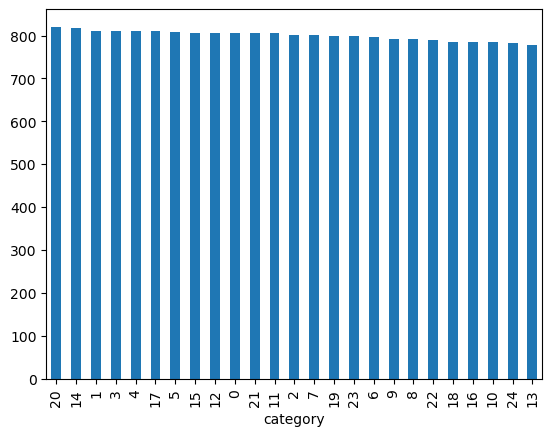

In [18]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

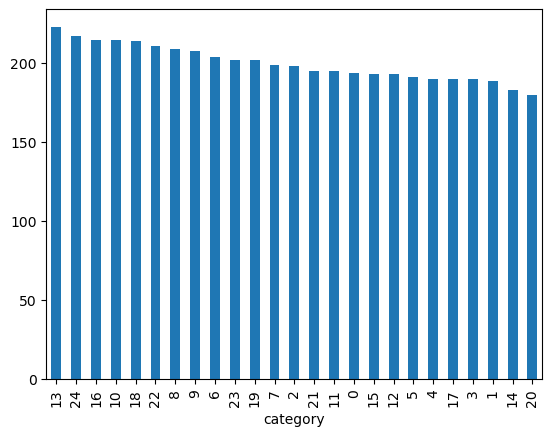

In [19]:
validate_df['category'].value_counts().plot.bar()

# Fit Model

In [25]:

epochs= 15
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\acer\AppData\Local\Temp\ipykernel_9408\1568250100.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15


1333/1333 [==============================] - 718s 538ms/step - loss: 0.2531 - accuracy: 0.9367 - val_loss: 0.0489 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 2/15
1333/1333 [==============================] - 709s 532ms/step - loss: 0.0645 - accuracy: 0.9835 - val_loss: 0.0147 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 3/15
1333/1333 [==============================] - 720s 540ms/step - loss: 0.0468 - accuracy: 0.9875 - val_loss: 0.0117 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 4/15
1333/1333 [==============================] - 738s 553ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0055 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 5/15
1333/1333 [==============================] - 719s 539ms/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.0099 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 6/15
1333/1333 [==============================] - 704s 528ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0031 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 7/15
1333/1333 [==========

# Save Model

In [43]:
model.save_weights("BSL101.h5")

# Load Model

In [44]:
model.load_weights("BSL101.h5")

# Virtualize Training

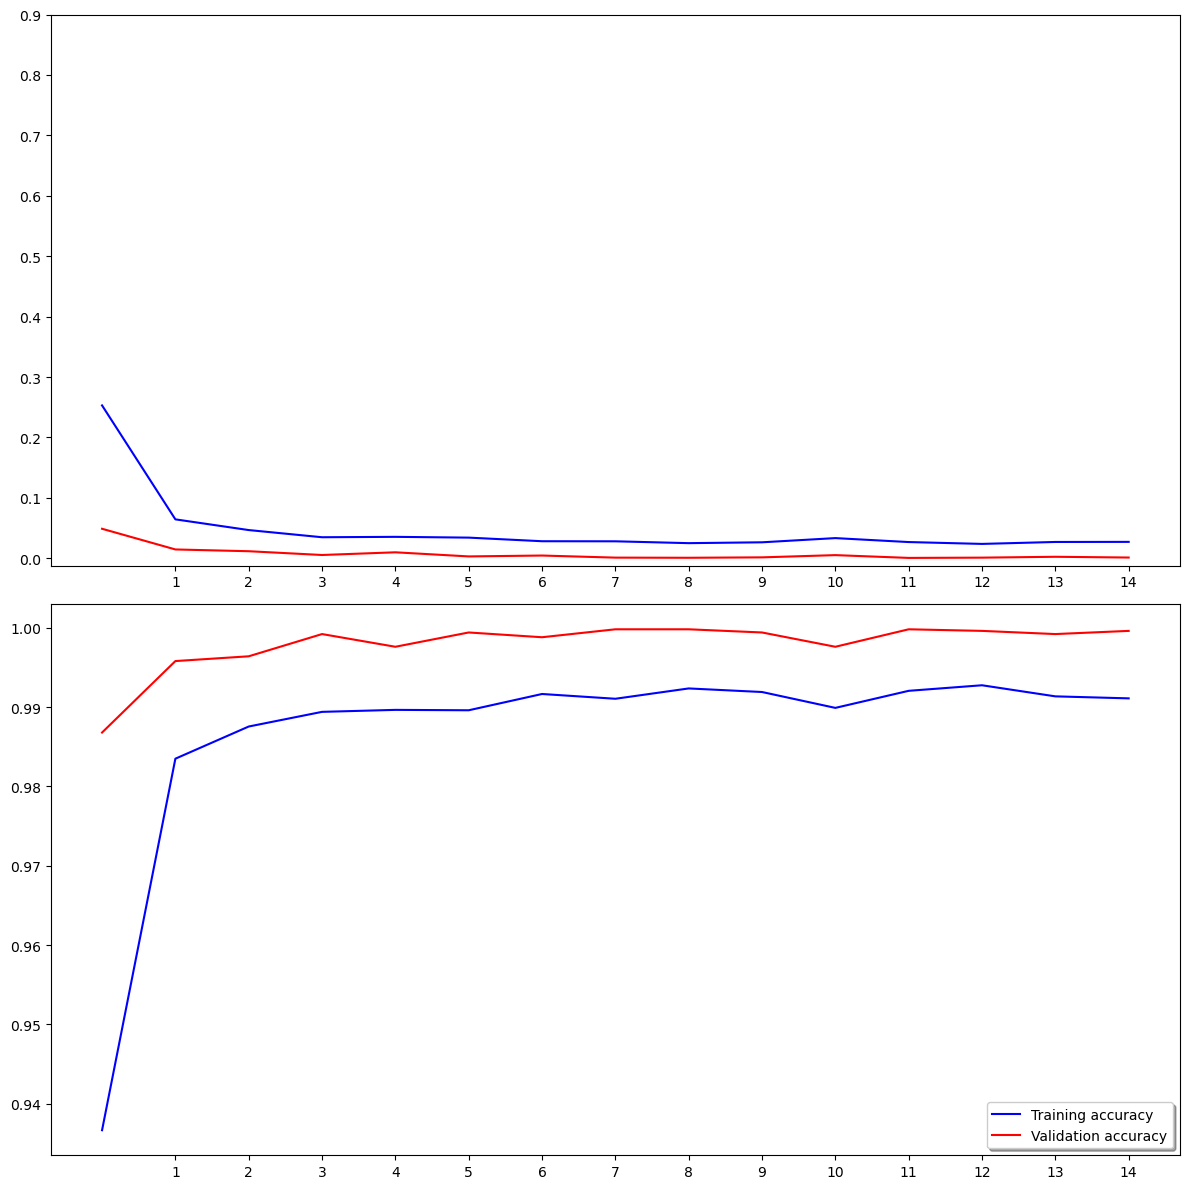

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Predict

In [ ]:
from keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = 'X (245).png'  # Change this to the path of your image
img = image.load_img(img_path, target_size=(128, 128))  # Adjust target_size as needed
img_array = image.img_to_array(img)
img_array /= 255.0  # Rescale pixel values to [0, 1] (assuming this was done during training)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the shape expected by the model (batch size of 1)

# Make predictions on the image
predictions = model.predict(img_array)

# Define the dictionary mapping numeric labels to alphabet letters
label_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K',
    10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T',
    19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y', 24: 'Z'
}

# Convert predictions from numeric labels to alphabet letters
predicted_label = label_mapping[np.argmax(predictions)]
predicted_probability = predictions[0][np.argmax(predictions)]

# Print the predicted class and probability
print("Predicted label:", predicted_label)
print("Predicted probability:", predicted_probability)

In [29]:
import cv2
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

# Load the pre-trained model
#model = load_model('catdog.h5')

# Define the dictionary mapping numeric labels to alphabet letters
label_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K',
    10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T',
    19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y', 24: 'Z'
}

# Function to preprocess the frame
def preprocess_frame(frame):
    frame_resized = cv2.resize(frame, (128, 128))  # Resize frame to match model's input size
    frame_resized = frame_resized / 255.0  # Rescale pixel values to [0, 1]
    frame_resized = np.expand_dims(frame_resized, axis=0)  # Add batch dimension
    return frame_resized

# Function to predict the letter from a frame
def predict_letter(frame):
    frame_preprocessed = preprocess_frame(frame)
    predictions = model.predict(frame_preprocessed)
    predicted_label = label_mapping[np.argmax(predictions)]
    return predicted_label

# Open camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()  # Read frame from camera

    # Predict letter
    predicted_letter = predict_letter(frame)
    cv2.putText(frame, predicted_letter, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)  # Overlay predicted letter on frame

    # Display the frame
    cv2.imshow('Camera', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release camera and close windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 46ms/step


In [53]:
cap.release()
cv2.destroyAllWindows()